# Data Deschise cu ajutorul Inteligentei Artificiale
Transparența presupune, în primul rând acces liber și neîngrădit la date de interes public.

Cu ajutorul tehnologiilor din AI putem rezolva aceasta problema si transforma aceste date inchise in date deschise, unde putem sa identificam persoanele care au donat mai mult decat este permis, sau la mai multe organizatii.

* mai multe detalii: https://www.facebook.com/groups/aiinactiune/
* list of documents https://a.cec.md/ro/reports

## Mod de lucru
* incarcati pdf folosind meniul din stanga
* rulati celulele de mai jos
* scrieti codu
* PR pe github 

In [ ]:
!apt-get install poppler-utils
!apt-get install tesseract-ocr-deu
!pip install ftfy
!apt-get install tesseract-ocr 
!pip install pytesseract
!pip install pdf2image

In [2]:
import tempfile, numpy as np
import pytesseract, cv2, json
from pytesseract import Output
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
%pylab inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
 PDFInfoNotInstalledError,
 PDFPageCountError,
 PDFSyntaxError
)
from PIL import Image
def pdf2img(file_path, n=None):
    """
    convert pdf in img
    file_path - pdf 
    n - if none return the images toghether, if int - return the n'th page as image

    return images, and number of pages
    """
    with tempfile.TemporaryDirectory() as path:
        images = convert_from_path(file_path, output_folder=path)
    min_img_width = max(img.width for img in images)
    total_height = 0
    for img in images:
        total_height += img.height
    merged_image = Image.new(images[0].mode, (min_img_width, total_height), (255,255,255))
    if n is not None:
      return images[n], len(images)
    y = 0
    for img in images:
        merged_image.paste(img, (0, y))
        y = y + img.height
    return images, len(images)
def tocv2(im):
  '''convert pillow image to cv2 format'''
  pil_image  = im.convert('RGB') 
  open_cv_image = np.array(pil_image) 
  # Convert RGB to BGR 
  open_cv_image = open_cv_image[:, :, ::-1].copy() 
  return open_cv_image

def rotate(image, angleG=None):
  '''calculate the angle and rotate the image'''
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)
  thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  coords = np.column_stack(np.where(thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]

  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  print("Rotation:", angle)
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  if angleG is not None:
    angle = angleG
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h),
    flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return angle, rotated

Populating the interactive namespace from numpy and matplotlib


In [6]:
!apt-get update
!apt-get install -y poppler-utils

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubu

In [ ]:
import glob 

current = glob.glob('*.pdf')[0]#"Ocnita.pdf"
print(current)
imgages, n = pdf2img(current, None)



Rotation: -2.8192291259765625


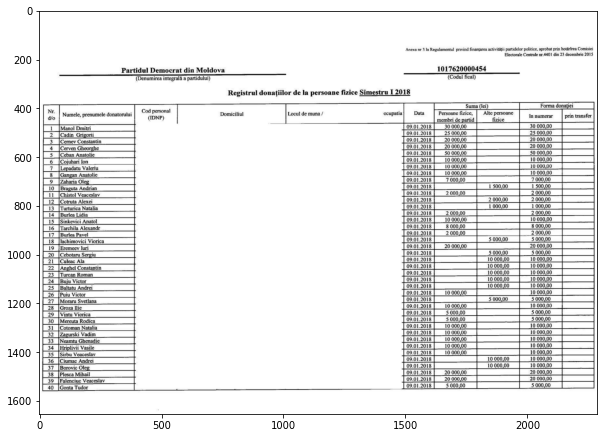

In [11]:
page = 1
img = imgages[page]
img = tocv2(img)
rangle, img = rotate(img, 0)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
def getRectangles(im, debug=False, conf=70):
    '''get the text boxes using ocr'''
    img = im.copy()
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(d['text'])
    boxes = []
    print(d.keys())
    for i in range(n_boxes):
        if int(d['conf'][i]) > conf:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            boxes.append([x, y, w, h, d['text'][i], d['line_num'][i]])
            if debug:
              #todo: solve the new version bug
              img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(img)
    return boxes
boxes = getRectangles(imgages[page], debug=False)
len(boxes), boxes[0]

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


(141, [1504, 156, 44, 12, 'Anexa', 1])

In [19]:
def savePDFsFromURL(url='https://a.cec.md/ro/reports',donatii=True, cotizatii=True, an=2019):
  '''save the pdfs from the page based on the filters'''
  pass

In [26]:
def getRows(boxes):
  '''tranform the boxes into table and check that the line are correct(show on img maybe)'''
  pass

In [ ]:
def processAllPages(images, path_save):
  '''get the rows from all the pdf pages'''
  pass

In [27]:
def processAllPdfs(path_pdfs, folder_save):
  '''get the rows from all pdfs and save csv files'''
  pass

In [ ]:
def analyseRows(df):
  """get the same names, top donations"""
  pass